In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
data = pd.read_csv('marketing_campaign.csv', header = 0, sep = ";")

In [4]:
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [5]:
# Categorical variables into dummies
categorical_vars = ['job', 'marital', 'education', 'contact', 'day', 'month', 'housing', 'default', 'loan', 'poutcome']
data_encoded = pd.get_dummies(data, columns = categorical_vars)

=== m = 9 ===
Number of trees = 1
                   importance
duration             0.268994
age                  0.087055
balance              0.077133
poutcome_success     0.039625
campaign             0.038658
...                       ...
day_31               0.001882
day_28               0.001297
job_unknown          0.001155
contact_telephone    0.001127
default_no           0.000766

[81 rows x 1 columns]
Number of trees = 2
               importance
duration         0.259693
age              0.080665
balance          0.077659
campaign         0.036889
pdays            0.030131
...                   ...
job_housemaid    0.002260
day_31           0.002007
default_no       0.001565
default_yes      0.001436
job_unknown      0.001082

[81 rows x 1 columns]
Number of trees = 3
                  importance
duration            0.253663
balance             0.076252
age                 0.076251
poutcome_success    0.043240
campaign            0.037085
...                      ...
day_2

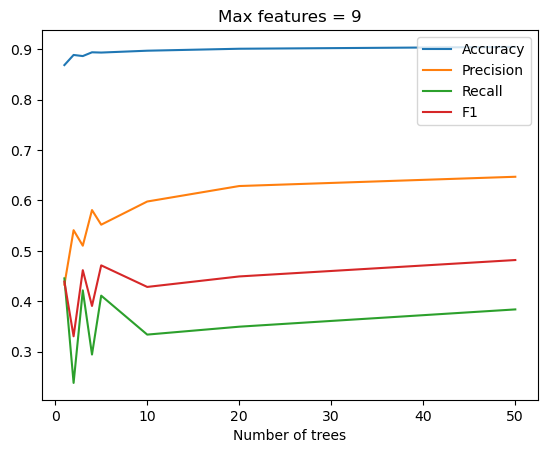

=== m = 81 ===
Number of trees = 1
                  importance
duration            0.288008
balance             0.088926
age                 0.087021
poutcome_success    0.077495
pdays               0.035064
...                      ...
loan_yes            0.001612
job_entrepreneur    0.001557
job_unknown         0.001383
default_yes         0.001009
default_no          0.000566

[81 rows x 1 columns]
Number of trees = 2
                  importance
duration            0.280395
balance             0.089213
age                 0.086719
poutcome_success    0.084087
pdays               0.036476
...                      ...
day_31              0.001338
job_entrepreneur    0.001180
job_unknown         0.001161
default_no          0.000769
default_yes         0.000534

[81 rows x 1 columns]
Number of trees = 3
                  importance
duration            0.279889
age                 0.089575
balance             0.086141
poutcome_success    0.086141
pdays               0.035379
...      

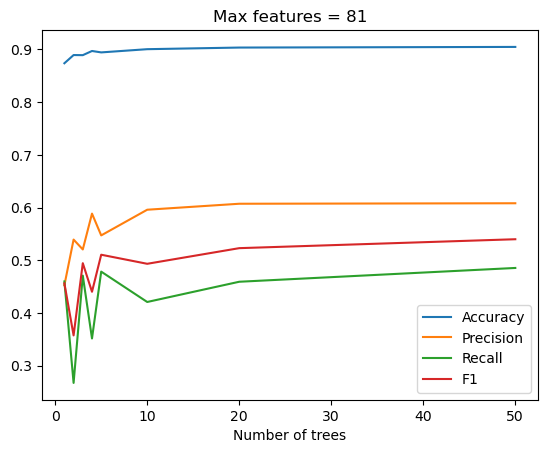

In [8]:
X = data_encoded.drop(columns = 'y')
Y = data_encoded['y']

# 1/3 of data to the testing sample
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

# Picks random subset of 𝑚 = √p features
max_feat_list = [int(np.sqrt(X.shape[1])), X.shape[1]]
n_trees_list = [1, 2, 3, 4, 5, 10, 20, 50]

# Fit rf to predict subscription
for max_features in max_feat_list:
    print('=== m =', max_features, '===')
    accuracy, precision, recall, f1 = [], [], [], []
    for n_trees in n_trees_list:
        print('Number of trees =', n_trees)
        rf = RandomForestClassifier(max_features = max_features, n_estimators = n_trees, random_state = 1).fit(X_train, Y_train)
        Y_pred = rf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, Y_pred))
        precision.append(precision_score(Y_test, Y_pred, pos_label = 'yes'))
        recall.append(recall_score(Y_test, Y_pred, pos_label='yes'))
        f1.append(f1_score(Y_test, Y_pred, pos_label='yes'))
        
# Evaluate importance of features        
        feature_imp = pd.DataFrame({'importance': rf.feature_importances_}, index = list(X.columns))
        print(feature_imp.sort_values(by = 'importance', ascending = False))

# Plot metrics against number of trees
    plt.figure()
    plt.plot(n_trees_list, accuracy)
    plt.plot(n_trees_list, precision)
    plt.plot(n_trees_list, recall)
    plt.plot(n_trees_list, f1)
    plt.xlabel('Number of trees')
    plt.legend(['Accuracy', 'Precision', 'Recall', 'F1'])
    plt.title('Max features = ' + str(max_features))
    plt.show()